# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Start of data cleaning and validating process

## Initial loading and observations

In [329]:
# Start coding here...
# define libraries for use 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [330]:
# import and initial checking of data 
data = pd.read_csv('recipe_site_traffic_2212.csv')
data.head()


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


# Data Validation
Data contains 947 rows and 8 columns. 
## Initial status as loaded in from original file is as follows: 
- recipe: Numeric with no missing values. 
- calories: Numeric with 52 missing values. 
- carbohydrate: Numeric with 52 missing values.
- sugar: Numeric with 52 missing values. 
- protein: Numeric with 52 missing values. 
- category: Character with 11 distinct categories. No missing values.
- servings: Character with 6 distinct categories. No missing values.
- high_traffic: Character with 373 missing values. 


## Checking individual columns for erroneous values. 

In [332]:
# checking for nans and not obvious incorrectly inputted values in each column individually
# recipe
col = 'recipe'
print(col, data[col].unique(), len(data[col].unique()), data[col].isna().sum())

# no missing or erroneous values

recipe [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

In [333]:
# calories
col = 'calories'
print(col, data[col].unique(), len(data[col].unique()), data[col].isna().sum())
# continuous, numeric, 52 nans

calories [        nan 3.54800e+01 9.14280e+02 9.70300e+01 2.70500e+01 6.91150e+02
 1.83940e+02 2.99140e+02 5.38520e+02 2.48280e+02 1.70120e+02 1.55800e+02
 2.74630e+02 2.52300e+01 2.17140e+02 3.16450e+02 4.54270e+02 1.69582e+03
 1.09075e+03 1.27550e+02 9.26000e+00 4.05300e+01 8.27300e+01 1.16149e+03
 5.62900e+01 4.11160e+02 5.74750e+02 5.95390e+02 1.64760e+02 2.15980e+02
 6.17110e+02 3.47060e+02 4.97170e+02 5.75630e+02 7.96890e+02 1.32178e+03
 4.45500e+01 2.64620e+02 4.48100e+01 6.21540e+02 2.90100e+02 5.76890e+02
 2.62120e+02 6.42900e+01 8.33900e+01 6.90100e+01 4.39100e+01 1.72425e+03
 2.93360e+02 1.27953e+03 3.67300e+02 7.45600e+01 1.31510e+02 2.12224e+03
 4.71700e+01 1.91780e+02 6.23000e+00 3.84930e+02 6.16950e+02 1.87870e+02
 1.60050e+02 8.13080e+02 5.66200e+02 2.60330e+02 6.17800e+01 7.17720e+02
 1.10515e+03 7.99390e+02 1.00000e+02 2.50847e+03 3.82200e+01 2.88600e+02
 3.20570e+02 7.67160e+02 5.57660e+02 6.55200e+01 7.91490e+02 1.99100e+01
 8.15600e+01 6.56900e+01 8.86470e+02 8.517

In [334]:
# carbohydrate
col = 'carbohydrate'
print(col, data[col].unique(), len(data[col].unique()), data[col].isna().sum())
# continuous, numeric, 52 nans

carbohydrate [       nan 3.8560e+01 4.2680e+01 3.0560e+01 1.8500e+00 3.4600e+00
 4.7950e+01 3.1700e+00 3.7800e+00 4.8540e+01 1.7630e+01 8.2700e+00
 2.3490e+01 1.1510e+01 6.6900e+00 2.6500e+00 1.8700e+00 1.0000e-01
 4.6500e+00 2.7550e+01 1.7440e+01 8.7910e+01 1.5300e+00 2.2350e+01
 5.1700e+01 1.3120e+01 6.2670e+01 3.3580e+01 5.2660e+01 2.3100e+01
 9.5000e+00 1.4700e+00 2.0710e+01 2.9100e+01 7.0070e+01 9.9820e+01
 1.5000e+00 4.6200e+00 1.4160e+01 4.4300e+00 4.7900e+00 1.7460e+01
 1.6950e+01 1.3060e+01 3.9170e+01 4.8160e+01 4.5520e+01 1.9160e+01
 1.9560e+01 8.9840e+01 4.7470e+01 3.3320e+01 2.5990e+01 6.0930e+01
 9.1700e+00 5.6430e+01 7.4380e+01 6.9450e+01 5.5510e+01 4.2450e+01
 8.8550e+01 1.7200e+00 5.1000e-01 1.3870e+01 7.1210e+01 6.6300e+00
 2.3140e+01 9.5890e+01 1.8110e+01 1.3090e+01 1.0500e+01 8.3790e+01
 2.4760e+01 3.6780e+01 2.6700e+00 9.8510e+01 3.5470e+01 3.3080e+01
 7.9900e+00 7.8020e+01 2.9960e+01 4.7610e+01 2.3450e+01 7.4160e+01
 4.4900e+00 1.3670e+01 8.8000e-01 1.0480e+01 3.75

In [335]:
# sugar
col = 'sugar'
print(col, data[col].unique(), len(data[col].unique()), data[col].isna().sum())
# continuous, numeric, 52 nans

sugar [       nan 6.6000e-01 3.0900e+00 3.8630e+01 8.0000e-01 1.6500e+00
 9.7500e+00 4.0000e-01 3.3700e+00 3.9900e+00 4.1000e+00 9.7800e+00
 1.5600e+00 1.0320e+01 1.0000e+01 4.6800e+00 2.9500e+00 3.9000e-01
 6.9000e-01 1.5100e+00 8.1600e+00 1.0491e+02 7.9500e+00 8.8800e+00
 1.1380e+01 2.7780e+01 1.8400e+00 2.6400e+00 1.7870e+01 6.2500e+00
 3.2830e+01 5.9200e+00 2.0000e-01 9.6300e+00 7.7500e+00 2.6200e+00
 1.8440e+01 1.0700e+01 1.0500e+00 2.0920e+01 3.3000e-01 7.7000e-01
 1.6200e+00 3.9540e+01 4.5800e+00 7.0000e-02 9.4000e+00 1.0800e+00
 6.9600e+00 1.6360e+01 1.7000e+00 5.2000e-01 1.3820e+01 6.5000e-01
 5.6000e+00 7.6530e+01 7.7700e+00 9.9900e+00 1.6000e+00 4.7000e-01
 2.5400e+00 1.2400e+00 1.0680e+01 1.4020e+01 3.7900e+00 3.3300e+00
 1.0200e+01 1.0600e+01 3.8000e+00 8.8300e+00 1.6240e+01 5.7000e-01
 3.0000e+00 5.8000e+00 2.1700e+00 2.3400e+00 9.2300e+00 1.6390e+01
 4.0800e+00 5.9100e+00 3.0100e+00 1.1130e+01 7.2800e+00 1.2330e+01
 1.2100e+00 6.4800e+00 5.4470e+01 4.7320e+01 4.7800e+00 

In [336]:
# protein
col = 'protein'
print(col, data[col].unique(), len(data[col].unique()), data[col].isna().sum())
# continuous, numeric, 52 nans

protein [       nan 9.2000e-01 2.8800e+00 2.0000e-02 5.3000e-01 5.3930e+01
 4.6710e+01 3.2400e+01 3.7900e+00 1.1385e+02 9.1000e-01 1.1550e+01
 2.5700e+00 9.5700e+00 1.5170e+01 7.9710e+01 6.1070e+01 3.3170e+01
 3.4900e+00 8.9100e+00 1.0810e+01 1.1930e+01 2.6040e+01 1.2570e+01
 3.4790e+01 7.0300e+01 1.3850e+01 4.9600e+00 2.2014e+02 3.2320e+01
 4.5890e+01 8.2580e+01 2.9700e+00 6.2400e+00 2.2800e+00 1.9510e+01
 1.5570e+01 3.2620e+01 5.9000e+00 3.9690e+01 4.0640e+01 4.2900e+00
 8.7050e+01 1.1200e+01 3.4400e+00 1.7000e-01 7.9200e+00 4.9370e+01
 1.3200e+00 1.8200e+01 7.3350e+01 4.5150e+01 8.7110e+01 8.1370e+01
 1.0800e+01 6.6690e+01 2.1200e+00 2.1700e+00 3.1200e+00 8.6090e+01
 4.4380e+01 1.3689e+02 4.2400e+00 4.5300e+00 7.2000e-01 7.1000e+00
 7.1510e+01 1.9750e+01 1.1460e+02 8.4230e+01 2.0900e+00 1.0253e+02
 2.0700e+00 3.1070e+01 1.9550e+01 5.1000e-01 9.1510e+01 1.1820e+01
 1.4520e+01 2.3700e+00 5.2400e+00 2.3900e+00 6.2080e+01 3.8000e-01
 4.6900e+01 2.6700e+00 5.6700e+00 8.6300e+00 2.1310e+0

In [337]:
# category
col = 'category'
print(col, data[col].unique(), len(data[col].unique()), data[col].isna().sum())
# object, 11 objects, should be 10, no missing

category ['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert'] 11 0


In [338]:
# servings
col = 'servings'
print(col, data[col].unique(), len(data[col].unique()), data[col].isna().sum())
# object, should be numeric, no missing

servings ['6' '4' '1' '2' '4 as a snack' '6 as a snack'] 6 0


In [339]:
# high_traffic
col = 'high_traffic'
print(col, data[col].dtype, np.unique(data[col].astype(str)), len(np.unique(data[col].astype(str))), data[col].isna().sum())
# character, should be high or low 

high_traffic object ['High' 'nan'] 2 373


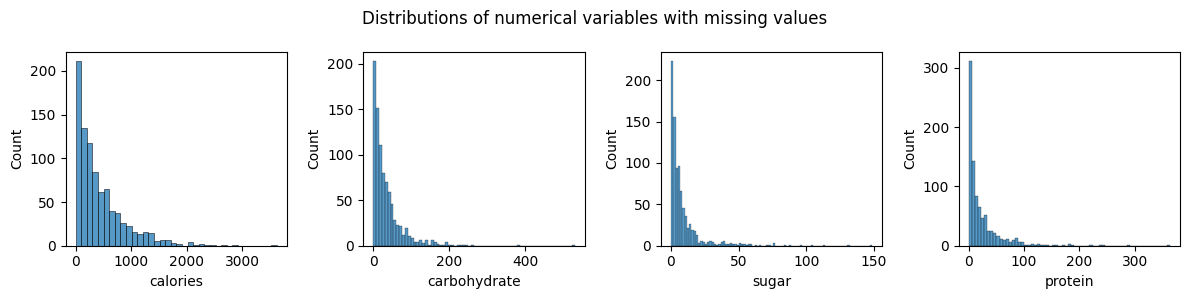

In [340]:
# calories, carbohydrate, sugar, protein - with 52/947 = 5.4% > 5% so must impute, must decide on imputation protocol
# # cleaning - checking for the distribution of the numerical data with missing variables
numericalVariables = ['calories', 'carbohydrate', 'sugar', 'protein']
fig, ax = plt.subplots(1, len(numericalVariables), figsize = (12,3), tight_layout = False)
for i, variable in enumerate(numericalVariables): 
    sns.histplot(data = data, x = variable, ax = ax[i])
fig.suptitle('Distributions of numerical variables with missing values')
plt.show()

In [341]:
# all are right skewed data, so best imputation method is to replace with median
data[numericalVariables] = data[numericalVariables].fillna(data[numericalVariables].median())
print(data.info())

# missing values removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


In [342]:
# category
# unique categories
print(np.unique(data['category']))

acceptedCategories = ['Lunch/Snacks', 'Beverages', 'Potato','Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal']

# identifying the erroneous category

mistakenCategory = [cat for cat in data['category'].unique() if cat not in acceptedCategories]

# chicken breast is incorrectly assigned, replace with chicken, with code which will allow to skip if cell being rerun
if mistakenCategory != []:
    print(f'Erroneous category is {mistakenCategory[0]}')
    data['category'][data['category'] == mistakenCategory[0]] = 'Chicken'

# check for the successful change
assert len(np.unique(data['category'])) == len(acceptedCategories)

# change to pd.categorical
data['category'] = data['category'].astype('category')



['Beverages' 'Breakfast' 'Chicken' 'Chicken Breast' 'Dessert'
 'Lunch/Snacks' 'Meat' 'One Dish Meal' 'Pork' 'Potato' 'Vegetable']
Erroneous category is Chicken Breast


In [343]:
# Servings
# unique values
print(f"Unique values before cleaning: {np.unique(data['servings'])}")

# currently a string, with extras, need to take only the first value
data['servings'] = data['servings'].apply(lambda x: int(float(x[0])))

# check for successful deployment
print(f"Unique values after cleaning: {np.unique(data['servings'])}")



Unique values before cleaning: ['1' '2' '4' '4 as a snack' '6' '6 as a snack']
Unique values after cleaning: [1 2 4 6]


In [344]:
# High traffic 
# check for unique values 
print(f"Unique values before: {np.unique(data['high_traffic'].astype(str))}")

# either High on nan, replace nan with 'Low' and change to str type 
data['high_traffic'].fillna('Low', inplace=True)
data['high_traffic'].astype(str)

# check for successful deployment 
print(f"Unique values after: {np.unique(data['high_traffic'])}")

# change to ordered categorical
highTrafficCategorical = CategoricalDtype(categories=["Low", "High"], ordered=True)

data['high_traffic'] = data['high_traffic'].astype(highTrafficCategorical)

Unique values before: ['High' 'nan']
Unique values after: ['High' 'Low']


In [345]:
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low


# Data validation
## Cleaning summary: 
- recipe: No cleaning required.
- calories: Missing values replace with median.
- carbohydrate: Missing values replace with median.
- sugar: Missing values replace with median.
- protein: Missing values replace with median.
- category: 'Chicken breast' is replaced by 'Chicken'. 
- servings: First element of string is taken and converted to float. 
- high_traffic: Missing values replaced with 'Low'.

## Final status of data
- recipe: Numeric with no missing values. 
- calories: Numeric with no missing values. 
- carbohydrate: Numeric with no missing values.
- sugar: Numeric with no missing values. 
- protein: Numeric with no missing values. 
- category: Character with 10 distinct categories. No missing values.
- servings: Numeric with no missing values. 
- high_traffic: Character with no missing values. 

# Data exactly meets specification set out in the document. 

# Exploratory data analysis

## Business question: What factors affect the high_traffic variable?

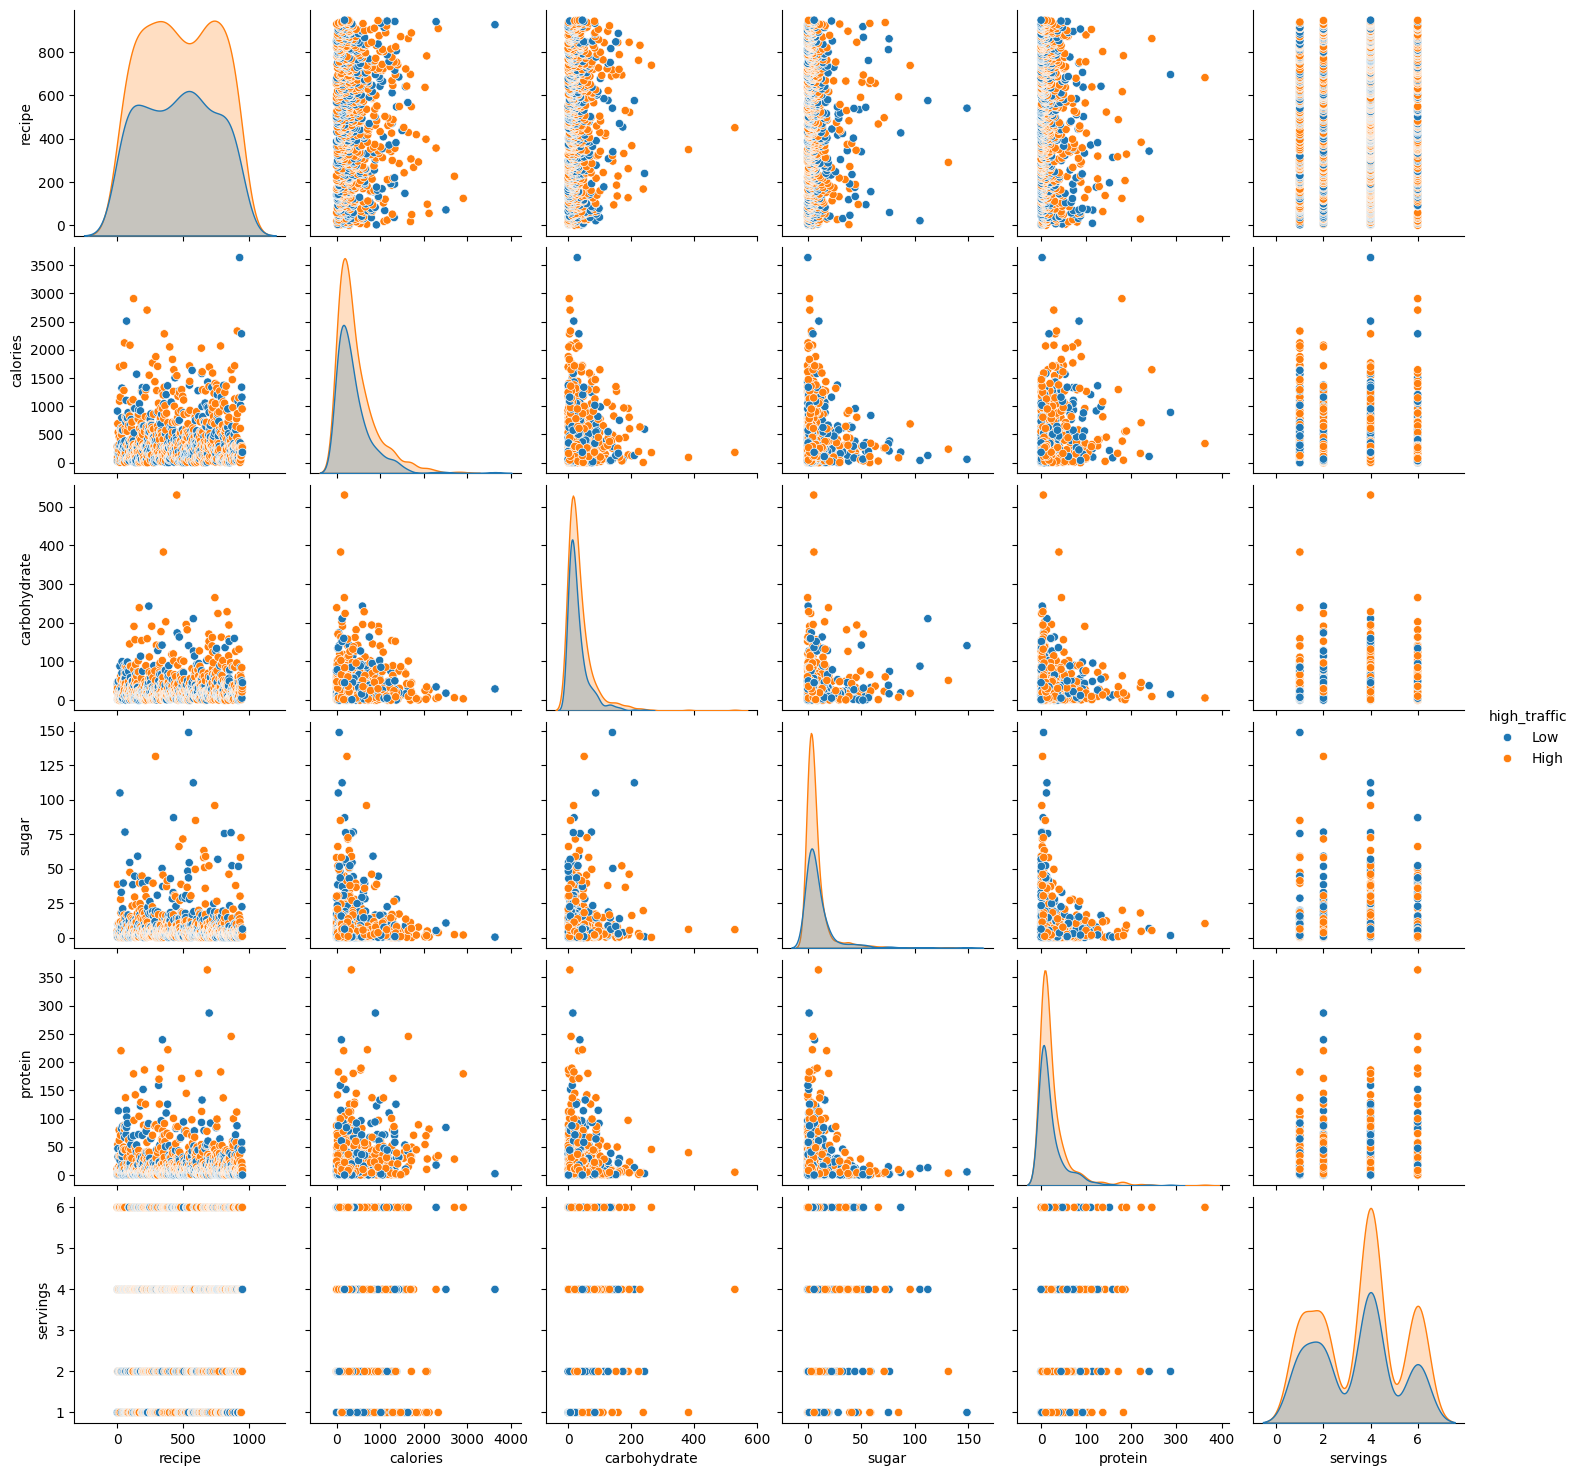

In [346]:
# initial check for possible relationships 
sns.pairplot(data, hue = 'high_traffic')
plt.show()

Observations from pairplot: 
- No obvious relationships between the numerical variables and the high-traffic variable
- numerical variables are skewed and will need to be mapped. 
- Servings should be categorical

In [347]:
# changing servings to categorical 
data['servings'] = data['servings'].astype('category')

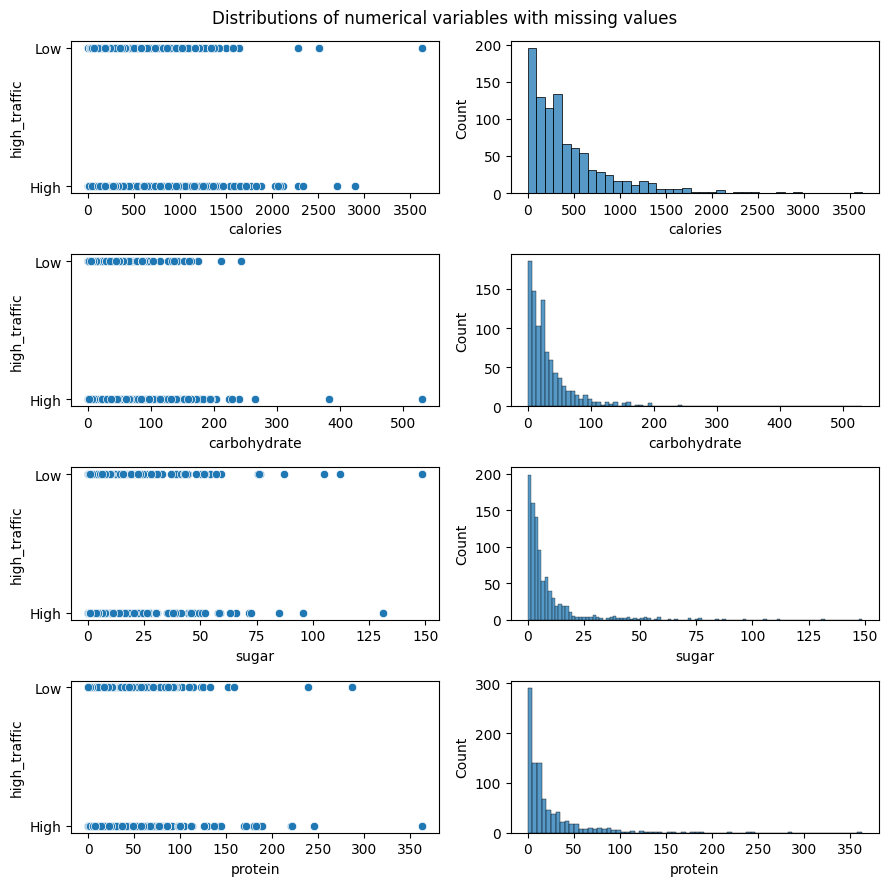

In [348]:
# calories, carbohydrate, sugar, protein - with 52/947 = 5.4% > 5% so must impute, must decide on imputation protocol
# # cleaning - checking for the distribution of the numerical data with missing variables
numericalVariables = ['calories', 'carbohydrate', 'sugar', 'protein']
fig, ax = plt.subplots(len(numericalVariables), 2, figsize = (9,9), tight_layout = False)
for i, variable in enumerate(numericalVariables): 
    sns.scatterplot(data = data, x = variable,  y = 'high_traffic', ax = ax[i,0])
    sns.histplot(data = data, x = variable, ax = ax[i,1])
fig.suptitle('Distributions of numerical variables with missing values')
plt.show()

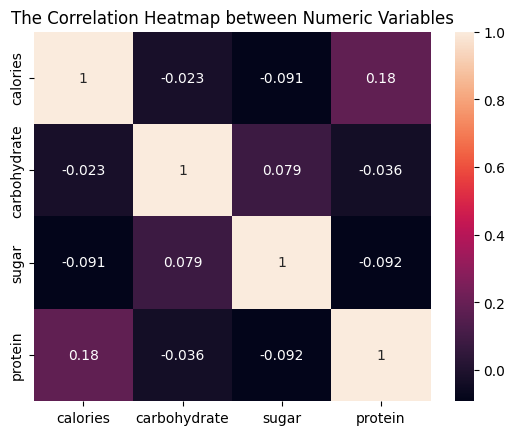

In [349]:
# numerical variables
# check for correlation between variables 
numericalVariables = ['calories', 'carbohydrate', 'sugar', 'protein']
numeric = data[numericalVariables]
sns.heatmap(numeric.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables');
plt.show()
# no obvious correlation between numeric variables


No obvious correlation between numerical variables

For numerical variables, distributions are skewed and will need addressing. Two options: 
- Map to a log.
- Remove outliers. 

Both options are explored here

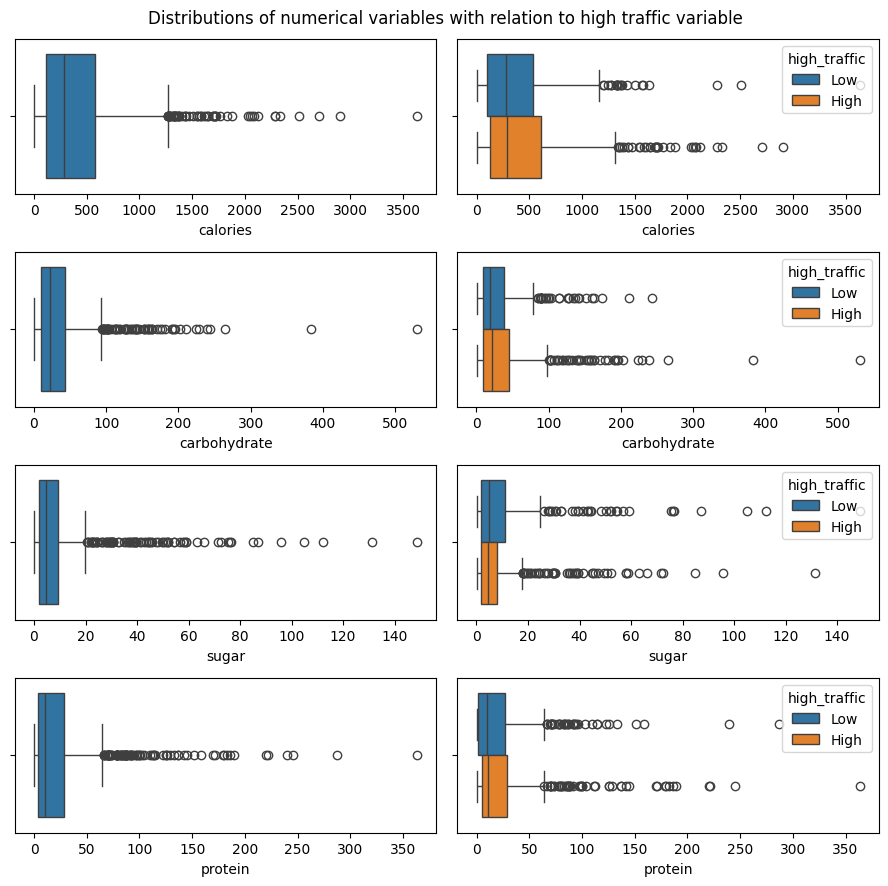

In [350]:
# calories, carbohydrate, sugar, protein - with 52/947 = 5.4% > 5% so must impute, must decide on imputation protocol
# # cleaning - checking for the distribution of the numerical data with missing variables
numericalVariables = ['calories', 'carbohydrate', 'sugar', 'protein']
fig, ax = plt.subplots(len(numericalVariables), 2, figsize = (9,9), tight_layout = False)
for i, variable in enumerate(numericalVariables): 
    sns.boxplot(data = data, x = variable, ax = ax[i,0])
    sns.boxplot(data = data, x = variable, ax = ax[i,1], hue = 'high_traffic')
fig.suptitle('Distributions of numerical variables with relation to high traffic variable')
plt.show()

Number of outliers for all these variables are significant. Further quantification is required to determine whether this is a viable methodology. No evident relationship between the variables and high_traffic also.

In [351]:
# number of outliers for each variable 
indiciesToRemove = []
for variable in numericalVariables: 
    twentyFive = np.quantile(data[variable], 0.25)
    seventyFive = np.quantile(data[variable], 0.75)
    IQR = seventyFive - twentyFive
    upper = seventyFive + 1.5*IQR
    lower = twentyFive - 1.5*IQR
    indiciesToRemove.extend(np.where(~((data[variable] > lower) & (data[variable] < upper)))[0])
    print(f'Number of outliers for {variable} is {len(data) - len(data[(data[variable] > lower) & (data[variable] < upper)])}')
indiciesRemoveUnique = np.unique(indiciesToRemove)
print(f'Number of total unique outliers is {len(indiciesRemoveUnique)}. This is {round(len(indiciesRemoveUnique)/len(data)*100,2)} % of the data')


Number of outliers for calories is 58
Number of outliers for carbohydrate is 66
Number of outliers for sugar is 82
Number of outliers for protein is 88
Number of total unique outliers is 265. This is 27.98 % of the data


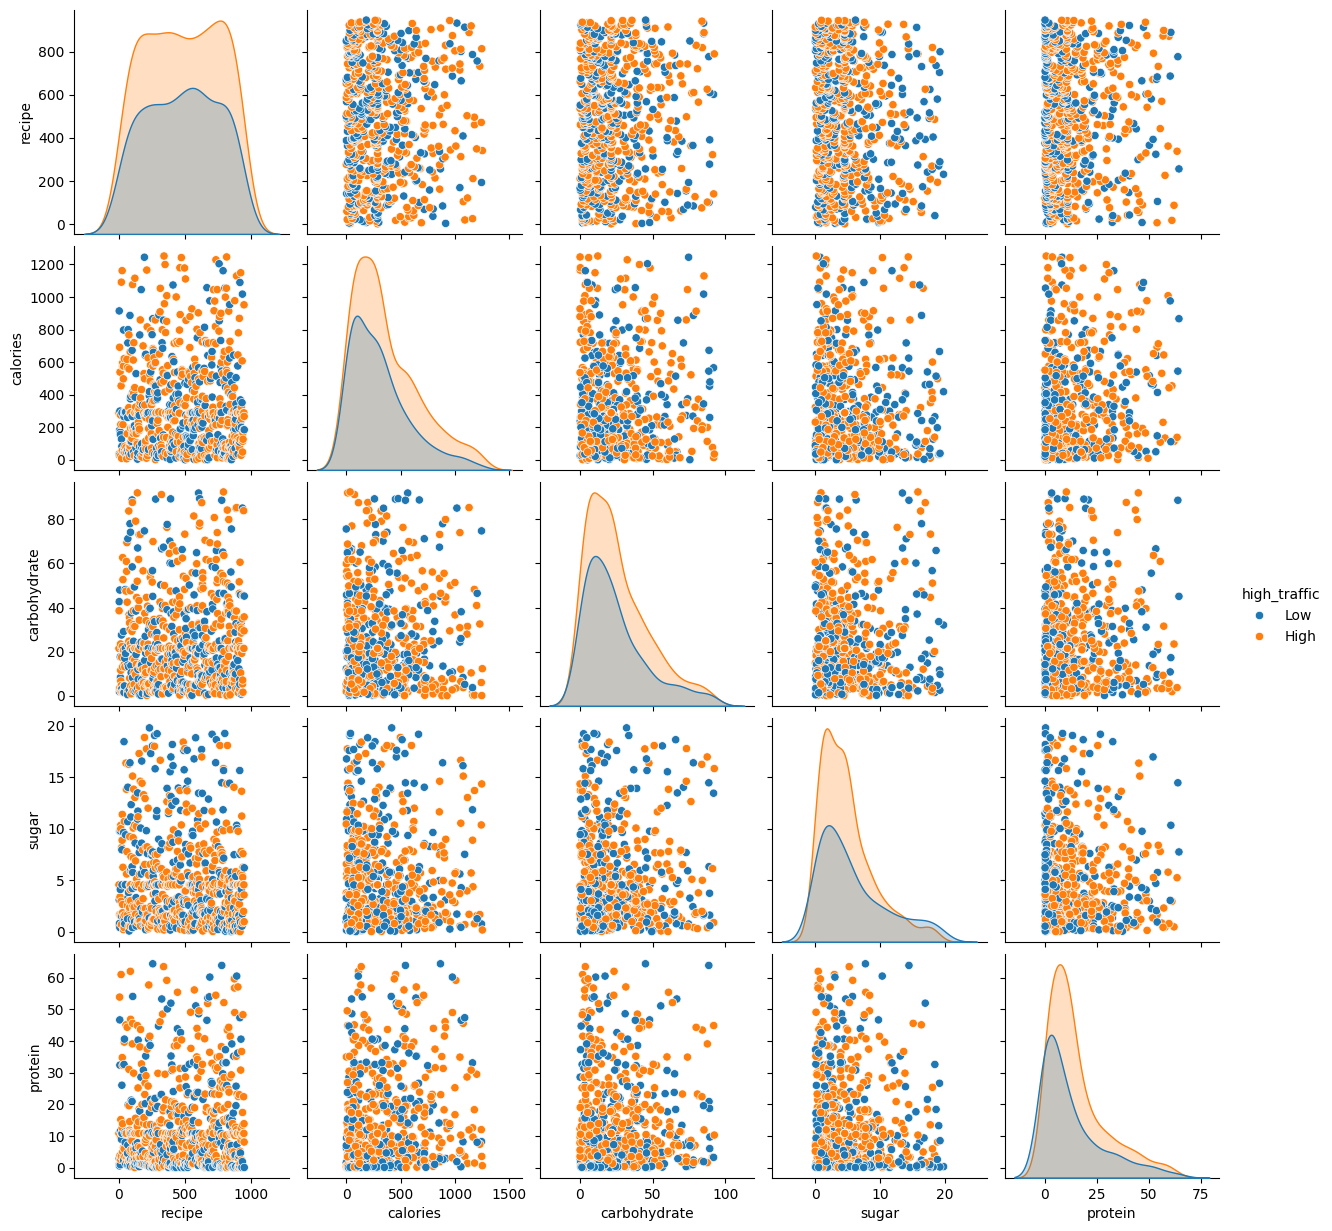

In [352]:
mapp = data.index.isin(indiciesRemoveUnique)
outliersRemoved = data[~mapp]
outliersRemoved.reset_index(drop = True, inplace =True )
outliersRemoved.describe()

sns.pairplot(outliersRemoved, hue = 'high_traffic')
plt.show()

Removing outliers would result in almost 30% loss of data and does not affect the skewness significantly, so is not a viable option. Testing mappings. 

In [353]:
data.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,427.846019,34.323464,8.799641,23.416283
std,273.519652,441.673556,42.836191,14.306785,35.486699
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,114.410000,9.135000,1.795000,3.465000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,576.225000,42.590000,9.285000,28.530000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [354]:
# log is the traditional method used, but log(0) is undefined
# only 0s in protein column
print(f"Number of zeros in protein column: {sum(data['protein'] == 0)}")

Number of zeros in protein column: 2


In [355]:
# removing zeros from protein column
dataForMapTests = data.drop(index = np.where(data['protein'] == 0)[0])
# check for removal
dataForMapTests.describe()

,recipe,calories,carbohydrate,sugar,protein
count,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.646561,428.140063,34.359958,8.812677,23.465841
std,273.586572,441.930574,42.873422,14.318732,35.507882
min,1.000000,0.140000,0.030000,0.010000,0.010000
25%,237.000000,114.740000,9.100000,1.800000,3.480000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.000000,576.380000,42.600000,9.340000,28.550000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [356]:
# applying mappings to test for any evident relationship between these variables and the high_traffic variable
for variable in numericalVariables:
    dataForMapTests[f'log_{variable}'] = np.log(dataForMapTests[variable])

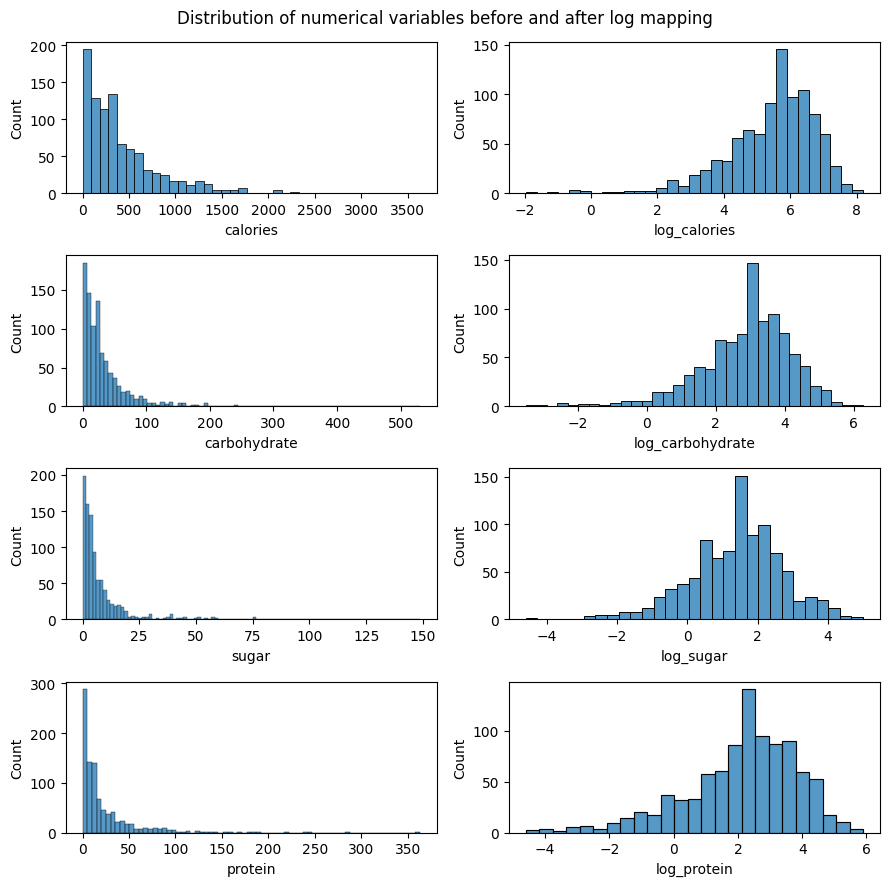

In [357]:
fig, ax = plt.subplots(len(numericalVariables), 2, figsize = (9,9), tight_layout = False)
for i, variable in enumerate(numericalVariables): 
    sns.histplot(data = dataForMapTests, x = f'{variable}', ax = ax[i,0])
    sns.histplot(data = dataForMapTests, x = f'log_{variable}', ax = ax[i,1])
fig.suptitle('Distribution of numerical variables before and after log mapping')
plt.show()
        

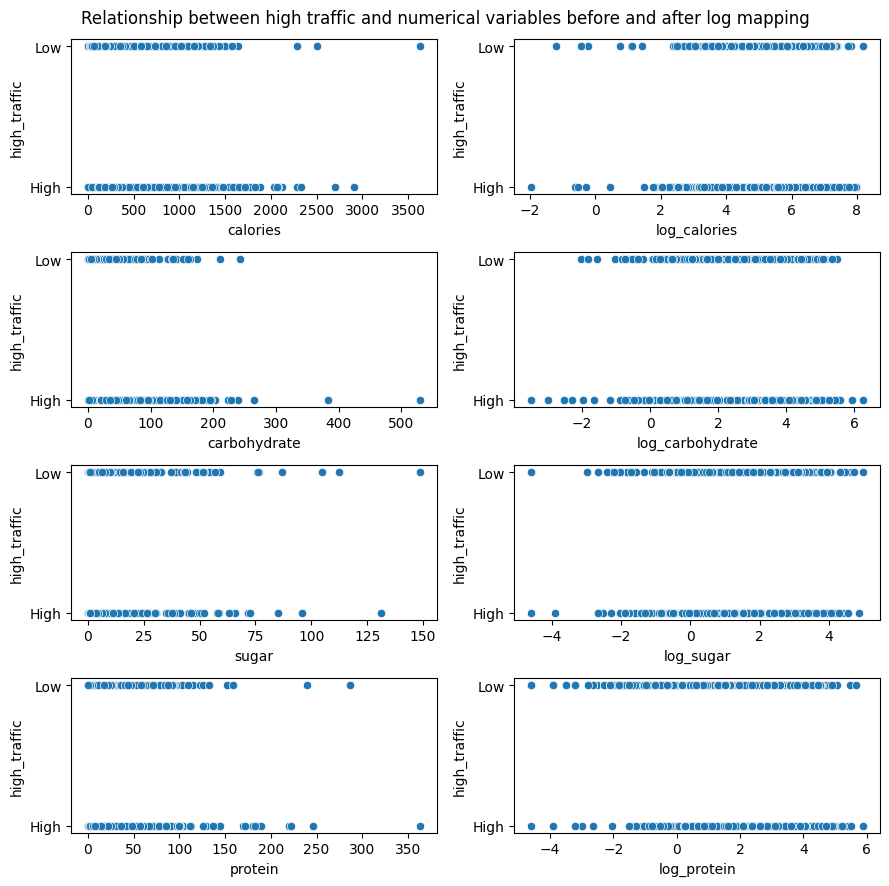

In [358]:
fig, ax = plt.subplots(len(numericalVariables), 2, figsize = (9,9), tight_layout = False)
for i, variable in enumerate(numericalVariables): 
    sns.scatterplot(data = dataForMapTests, x = f'{variable}',  y = 'high_traffic', ax = ax[i,0])
    sns.scatterplot(data = dataForMapTests, x = f'log_{variable}', y = 'high_traffic', ax = ax[i,1])
fig.suptitle('Relationship between high traffic and numerical variables before and after log mapping')
plt.show()
        

Distribution is more normal, but there is still no evident relationship between the mapped variables and the high_traffic variables. Moving on to categorical/character variables.

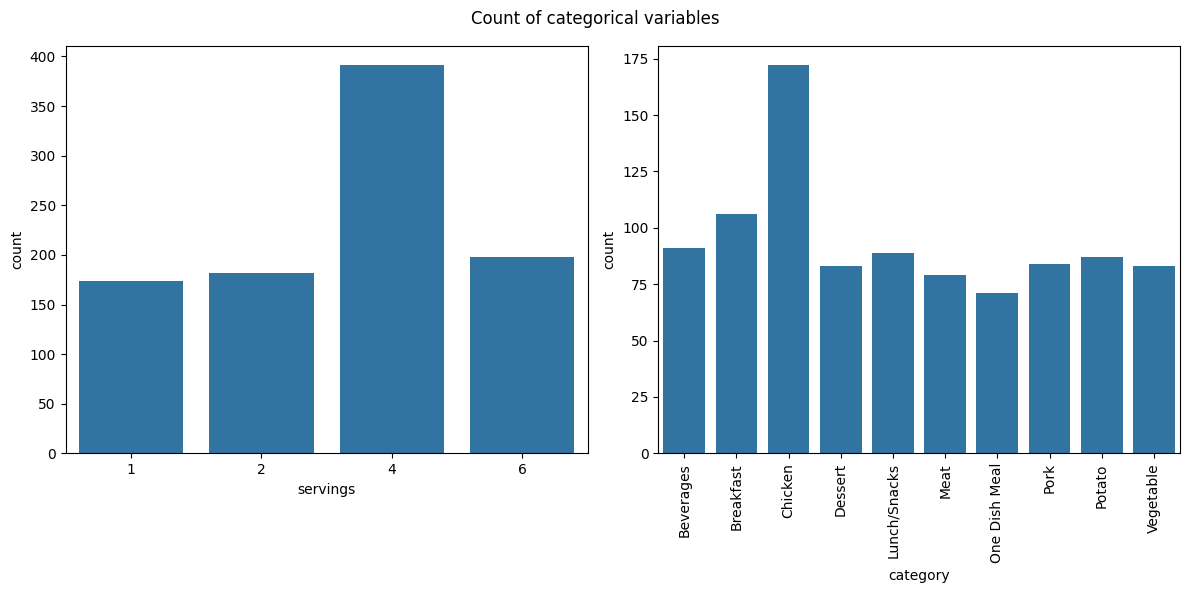

In [359]:
# categorical variables
categoricalVariables = ['servings', 'category']
fig, ax = plt.subplots(1,2, figsize = (12,6), tight_layout = False)
for i, variable in enumerate(categoricalVariables): 
    sns.countplot(data = dataForMapTests, x = variable, ax = ax[i])
plt.xticks(rotation = 90)
plt.suptitle('Count of categorical variables')
plt.show()

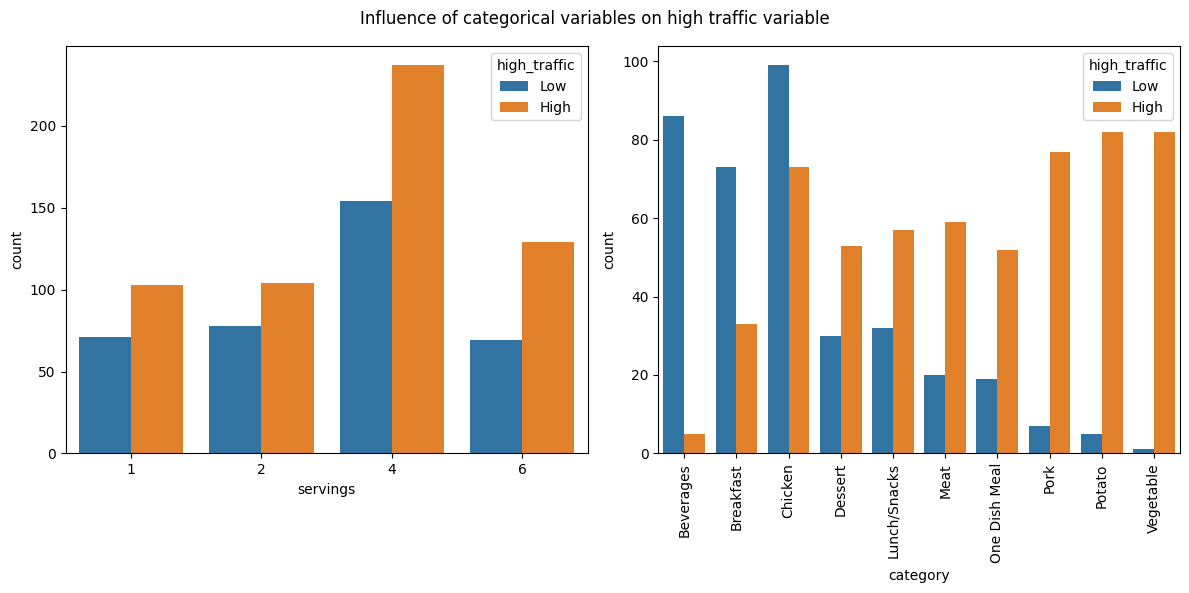

In [360]:
# categorical variables
categoricalVariables = ['servings', 'category']
fig, ax = plt.subplots(1,2, figsize = (12,6), tight_layout = False)
for i, variable in enumerate(categoricalVariables): 
    sns.countplot(data = dataForMapTests, x = variable, ax = ax[i], hue = 'high_traffic')
plt.xticks(rotation = 90)
plt.suptitle('Influence of categorical variables on high traffic variable')
plt.show()

Difference in counts between categories with relation to high_traffic variable. 

# Machine learning model development 
- This is a logistic regression problem. 
- numerical variables have a weak relationship with the outcome and are therefore not included. 
- categorical variables are included 

In [361]:
# Baseline model

colsToModel = ['category','servings'] 
X = data[colsToModel]
X = pd.get_dummies(X, 
                  # Specify the columns from the instructions
                  columns = ["category", 'servings'],
                  # Set the prefix
                  prefix = ['category', 'servings']
                )
y = (data[['high_traffic']] == 'High')*1
y = y.values


X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.33, random_state=42)
baselineModel = LogisticRegression(random_state=42)
baselineModel.fit(X_train, y_train)
baseModelPredictions = baselineModel.predict(X_test)
baseModelScore = baselineModel.score(X_test, y_test)
print(f'Score for baseline model is {round(baseModelScore,2)}')
print(f'Precision for baseline model is {round(precision_score(baseModelPredictions, y_test),2)}')
print(f'Recall for baseline model is {round(recall_score(baseModelPredictions, y_test),2)}')


Score for baseline model is 0.75
Precision for baseline model is 0.79
Recall for baseline model is 0.81


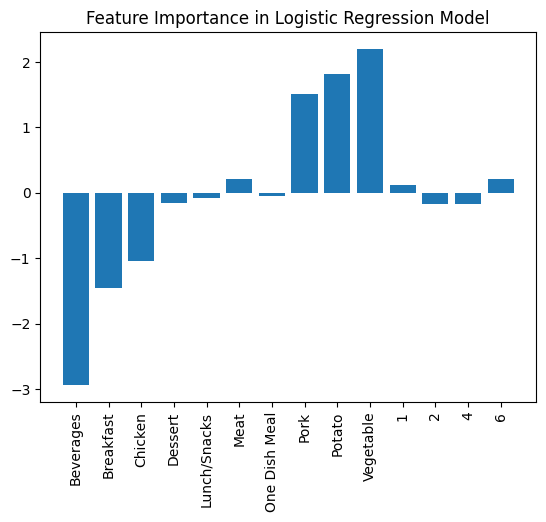

In [362]:
resultdict = {}
for i in range(len(X.columns)):
    resultdict[X.columns[i][X.columns[i].find('_')+1:]] = baselineModel.coef_[0][i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation=90)
plt.title('Feature Importance in Logistic Regression Model');

Best max_depth is: 3 
Testing score is: 0.7412140575079872


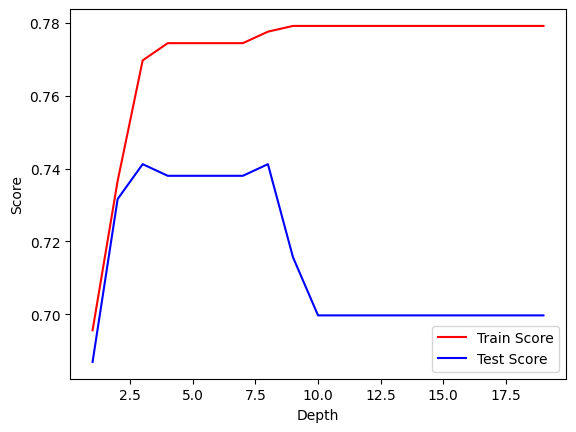

In [363]:
# refining the decision tree classifier
train_score = []
test_score = []

for i in range(1,20):
    tree = DecisionTreeClassifier(max_depth=i,random_state=42)
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    train_score.append([i, tree.score(X_train,y_train)])
    test_score.append([i,tree.score(X_test,y_test)])

train_score = np.array(train_score)
test_score = np.array(test_score)

depthToChoose = int(test_score[np.argmax(test_score[:,1]),0])


plt.plot(train_score[:,0], train_score[:,1], 'r-', label = 'Train Score')
plt.plot(test_score[:,0], test_score[:,1], 'b-', label = 'Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.legend()
print(f'Best max_depth is: {depthToChoose} \nTesting score is: {test_score[np.argmax(test_score[:,1]),1]}')

In [364]:
# comparison model 
comparisonModel = DecisionTreeClassifier(max_depth=depthToChoose, random_state = 42) 
comparisonModel.fit(X_train, y_train)
comparisonModelScore = comparisonModel.score(X_test, y_test)
comparisonModelPrediction = comparisonModel.predict(X_test)

print(f'Score for comparison model is {round(comparisonModelScore,2)}')
print(f'Precision for comparison model is {round(precision_score(comparisonModelPrediction, y_test),2)}')
print(f'Recall for comparison model is {round(recall_score(comparisonModelPrediction, y_test),2)}')

Score for comparison model is 0.74
Precision for comparison model is 0.8
Recall for comparison model is 0.79


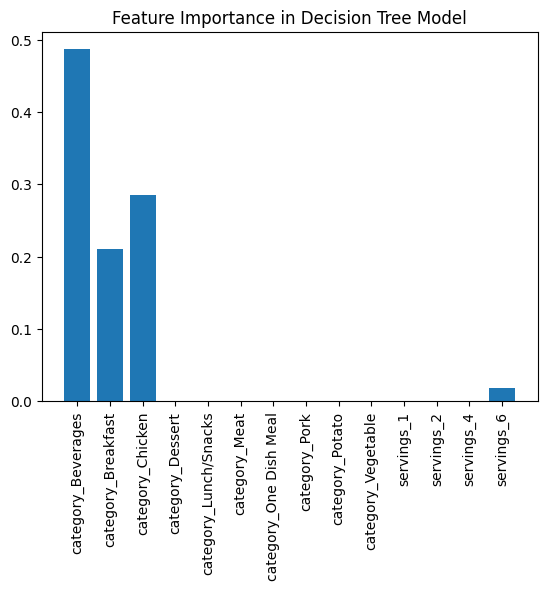

In [365]:
resultdict = {}
for i in range(len(X.columns)):
    resultdict[X.columns[i]] = comparisonModel.feature_importances_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation=90)
plt.title('Feature Importance in Decision Tree Model');

In [366]:
# metric is % of correctly assigned positive cases 
def performanceMetric(y_pred, y_test): 
    mask = y_pred.reshape(-1,1) == 1
    results = y_test[mask] == y_pred.reshape(-1,1)[mask]
    resultPercentage = np.round(sum(results)/len(results),2)*100
    print(f'Of the {sum(mask)[0]} that were predicted to be high traffic, {resultPercentage} % were correctly assigned')
    return [resultPercentage, sum(results),len(results) - sum(results), len(results)]

basePerformance = performanceMetric(baseModelPredictions, y_test)
comparisonPerformance = performanceMetric(comparisonModelPrediction, y_test)

Of the 190 that were predicted to be high traffic, 81.0 % were correctly assigned
Of the 197 that were predicted to be high traffic, 79.0 % were correctly assigned


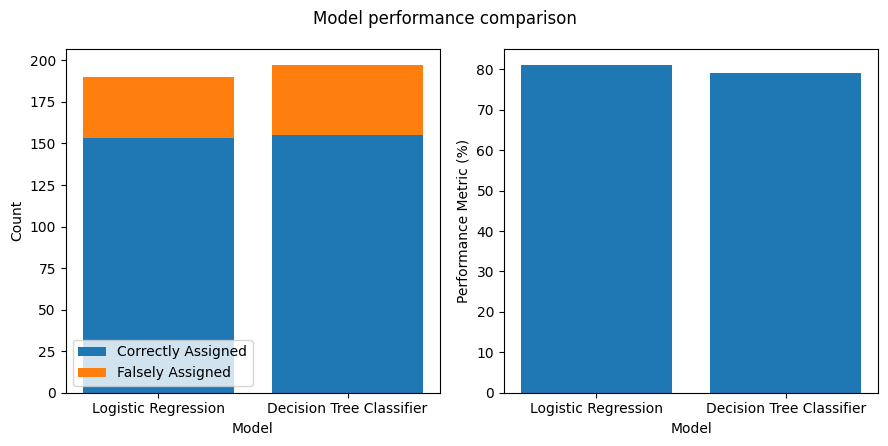

In [367]:
fig, ax = plt.subplots(1,2, figsize = (9,4.5),tight_layout = False)
bottom = np.zeros(2)
true = [basePerformance[1], comparisonPerformance[1]]
false = [basePerformance[2], comparisonPerformance[2]]
models = ['Logistic Regression', 'Decision Tree Classifier']
labels = ['Correctly Assigned', 'Falsely Assigned']
for vals in [true, false]:
    p = ax[0].bar(models, vals, bottom=bottom)
    bottom += vals


ax[0].legend(labels = labels, loc = 'lower left')
ax[0].set_ylabel('Count')
ax[0].set_xlabel("Model")

x = ['Logistic Regression', 'Decision Tree Classifier']
y = [basePerformance[0], comparisonPerformance[0]]
ax[1].bar(x, y)
plt.suptitle('Model performance comparison')
ax[1].set_xlabel("Model")
ax[1].set_ylabel("Performance Metric (%)")

plt.show()

# Summary and recommendations 
- Logistic regression was used to identify whether a recipe will be high-traffic or not. 
- Using a logistic regression model, it is possible to predict which recipes will be high traffic with an 80 % accuracy. 
- Logistic regression model recomended.
- From the analysis, the main contributing factors to determination of the traffic of the recipe include the category and the number of servings. To have a higher probability of getting a high traffic recipe select from vegetable, potato or pork dishes and avoid beverages, breakfast and chicken. 
- Continue to refine, test and check the model after testing and before implementation. 


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation